In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

# Path to the dataset folder
data_path = 'stock'

# List all files in the folder to confirm access
files = os.listdir(data_path)
print("Files in dataset folder:", files)

Files in dataset folder: ['ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GAIL.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFRATEL.csv', 'INFY.csv', 'IOC.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 'NIFTY50_all.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'SHREECEM.csv', 'stock_metadata.csv', 'SUNPHARMA.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'VEDL.csv', 'WIPRO.csv', 'ZEEL.csv']


In [3]:
import sys
print("Python executable:", sys.executable)
print("Python version:", sys.version)

Python executable: c:\Users\ASUS\AppData\Local\Programs\Python\Python313\python.exe
Python version: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]


In [5]:
import pandas as pd
print(pd.__version__)


2.2.3


In [6]:
import pandas as pd

dataset_file = os.path.join(data_path, 'ADANIPORTS.csv')  # Replace with your actual file name
df = pd.read_csv(dataset_file)
print(df.head())


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date', inplace=True)


In [ ]:
print("Missing values in dataset:", df.isnull().sum())


Missing values in dataset: Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64


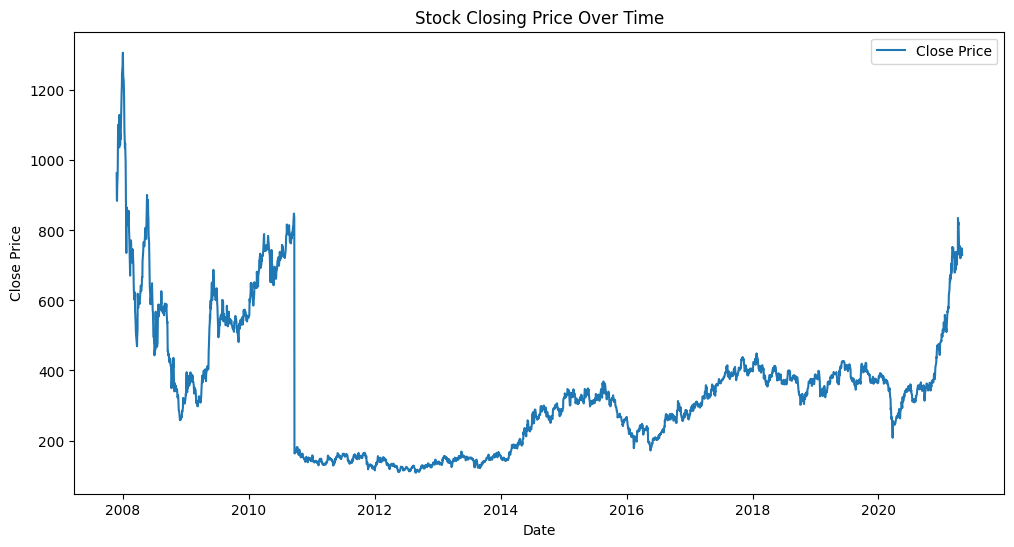

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
df['30_day_MA'] = df['Close'].rolling(window=30).mean()
df['100_day_MA'] = df['Close'].rolling(window=100).mean()

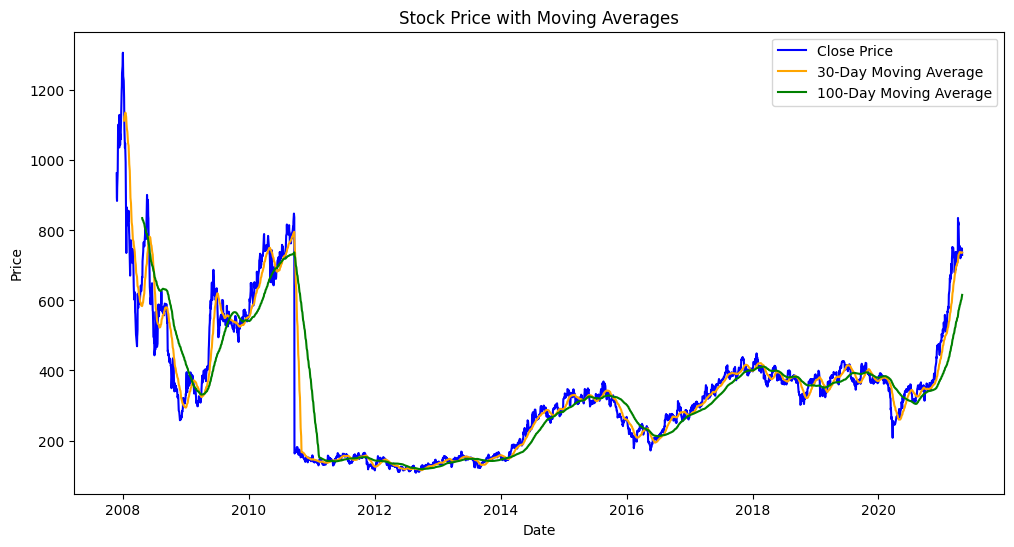

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['30_day_MA'], label='30-Day Moving Average', color='orange')
plt.plot(df['100_day_MA'], label='100-Day Moving Average', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

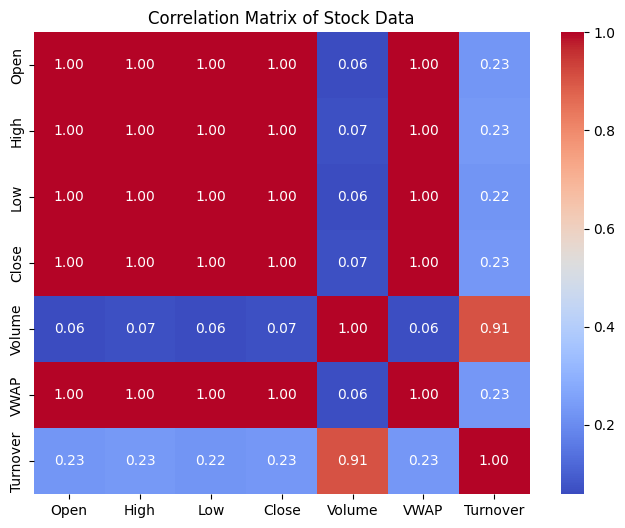

In [ ]:
correlation = df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Turnover']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Stock Data')
plt.show()

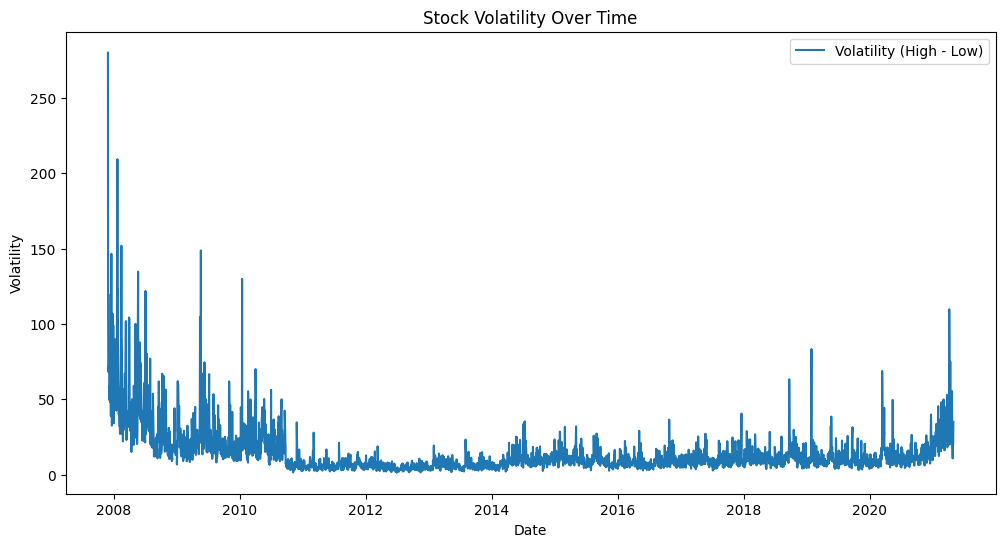

In [ ]:
df['Volatility'] = df['High'] - df['Low']

plt.figure(figsize=(12, 6))
plt.plot(df['Volatility'], label='Volatility (High - Low)')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [ ]:
df['Pct_Change'] = df['Close'].pct_change() * 100

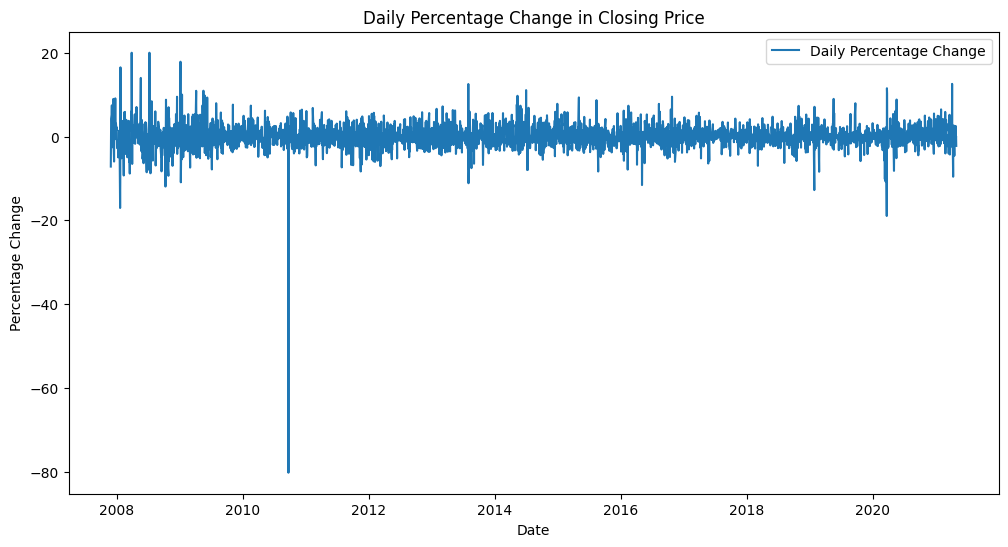

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Pct_Change'], label='Daily Percentage Change')
plt.title('Daily Percentage Change in Closing Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

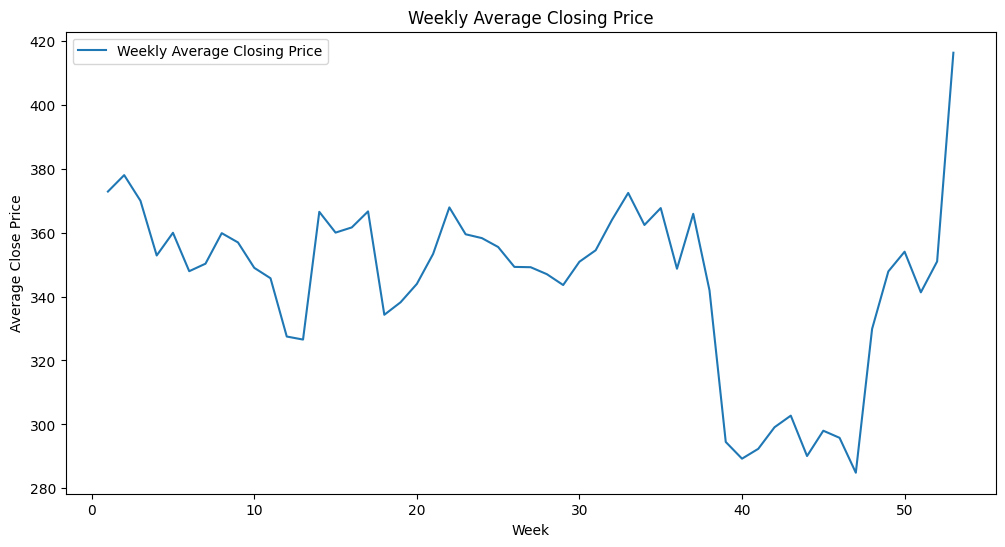

In [ ]:
df['Week'] = df.index.isocalendar().week
weekly_avg = df.groupby('Week')['Close'].mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_avg, label='Weekly Average Closing Price')
plt.title('Weekly Average Closing Price')
plt.xlabel('Week')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

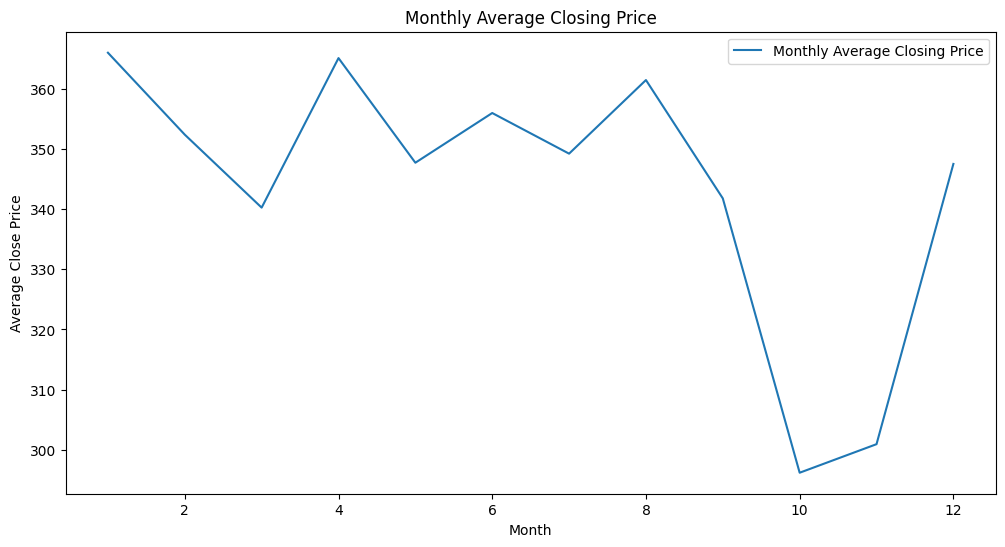

In [ ]:
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg, label='Monthly Average Closing Price')
plt.title('Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
data_path = '/content/drive/My Drive/Collab Dataset/stock'
files = os.listdir(data_path)
print("Files in dataset folder:", files)

Files in dataset folder: ['ADANIPORTS.csv', 'stocksdata']


In [ ]:
data_path = '/content/drive/My Drive/Collab Dataset/stock'  # Path to the directory containing CSV files
# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Check if any CSV files were found
if csv_files:
    # Construct the full path to the first CSV file
    file_path = os.path.join(data_path, csv_files[0])
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    # Display the first 5 rows of the DataFrame
    print(df.head())
else:
    print("No CSV files found in the directory.")

         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
fig = px.line(df, x='Date', y='Close', title='Stock Closing Price Over Time',
              labels={'Close': 'Closing Price', 'Date': 'Date'})

# Add hover data to display values
fig.update_traces(hovertemplate='Date: %{x}<br>Close: %{y}')

# Customize layout for better interactivity
fig.update_layout(
    hovermode='x unified',  # Show tooltip for x-axis alignment
    xaxis_title="Date",
    yaxis_title="Close Price",
    template="plotly_dark"  # Optional theme
)

# Show the plot
fig.show()